In [1]:
# %load kinase_single_well_spectra_experiment


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


# In[13]:


import assaytools


# In[14]:


from assaytools import platereader


# In[15]:

# filenames = glob('*.xml')
# filenames = str(filenames.sort())

filenames = [
   'EEG_single_well_conc_0_20181107_110725.xml',
    'EEG_single_well_conc_1_20181107_112420.xml',
    'EEG_single_well_conc_2_20181107_113940.xml',
    'EEG_single_well_conc_3_20181107_115458.xml',
    'EEG_single_well_conc_4_20181107_121019.xml',
    'EEG_single_well_conc_5_20181107_122542.xml',
    'EEG_single_well_conc_6_20181107_124104.xml',
    'EEG_single_well_conc_7_20181107_125627.xml',
    'EEG_single_well_conc_8_20181107_131149.xml',
    'EEG_single_well_conc_9_20181107_132712.xml',
    'EEG_single_well_conc_10_20181107_134234.xml',
    'EEG_single_well_conc_11_20181107_135800.xml',
    'EEG_single_well_conc_12_20181107_141326.xml',
    'EEG_single_well_conc_13_20181107_142852.xml',
    'EEG_single_well_conc_14_20181107_144418.xml',
    'EEG_single_well_conc_15_20181107_145942.xml',
    'EEG_single_well_conc_16_20181107_151507.xml'
]

datapath = 'infinite_results'


# In[16]:


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])


# In[17]:

reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)


# In[18]:


plate_layout = pd.read_excel('20181026_plate_layout_for_binding_assay.xlsx', header=None)
plate_layout = plate_layout.loc[:, 0:1]
plate_layout.columns = ['well', 'name']
if len(list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')) > 0:
    list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')

In [4]:

# In[19]:


nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'

title = 'Specta Reads at 280nm'
data = np.zeros([nrows, ncols, nreads, 4], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = [list(reads[i][label][well].values()) for i in range(nreads)]
        for i in range(nreads):
            measurements[i] = [x if x != 'OVER' else 0 for x in measurements[i]]
        data[row_index,col_index,:] = np.array(measurements)
        print(well)
        print(measurements)

# print(well)
# print(data)
        


A1
[['3082', '1371', '813', '557'], ['3380', '1686', '1010', '644'], ['4274', '2690', '1644', '985'], ['5652', '4358', '2729', '1535'], ['7145', '6161', '3933', '2203'], ['7436', '6724', '4523', '2613'], ['11050', '11214', '7434', '4131'], ['10898', '11031', '7571', '4263'], ['13027', '13194', '8877', '4947'], ['12930', '13093', '8793', '4975'], ['14004', '14291', '9393', '5113'], ['15567', '16093', '10483', '5599'], ['14958', '14896', '9764', '5209'], ['16476', '16921', '11051', '5918'], ['16125', '16780', '10685', '5757'], ['19440', '20270', '12900', '6900'], ['18943', '20269', '13449', '7176']]
A2
[['4238', '1840', '1093', '748'], ['4279', '1847', '1093', '739'], ['4238', '1831', '1081', '725'], ['4115', '1819', '1050', '711'], ['4012', '1770', '1027', '704'], ['3999', '1786', '1038', '709'], ['3988', '1773', '1059', '706'], ['3892', '1749', '1043', '710'], ['4006', '1822', '1108', '747'], ['4030', '1866', '1177', '807'], ['3989', '1982', '1300', '873'], ['4003', '2222', '1516', '10

/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale 

/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale 

/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale 

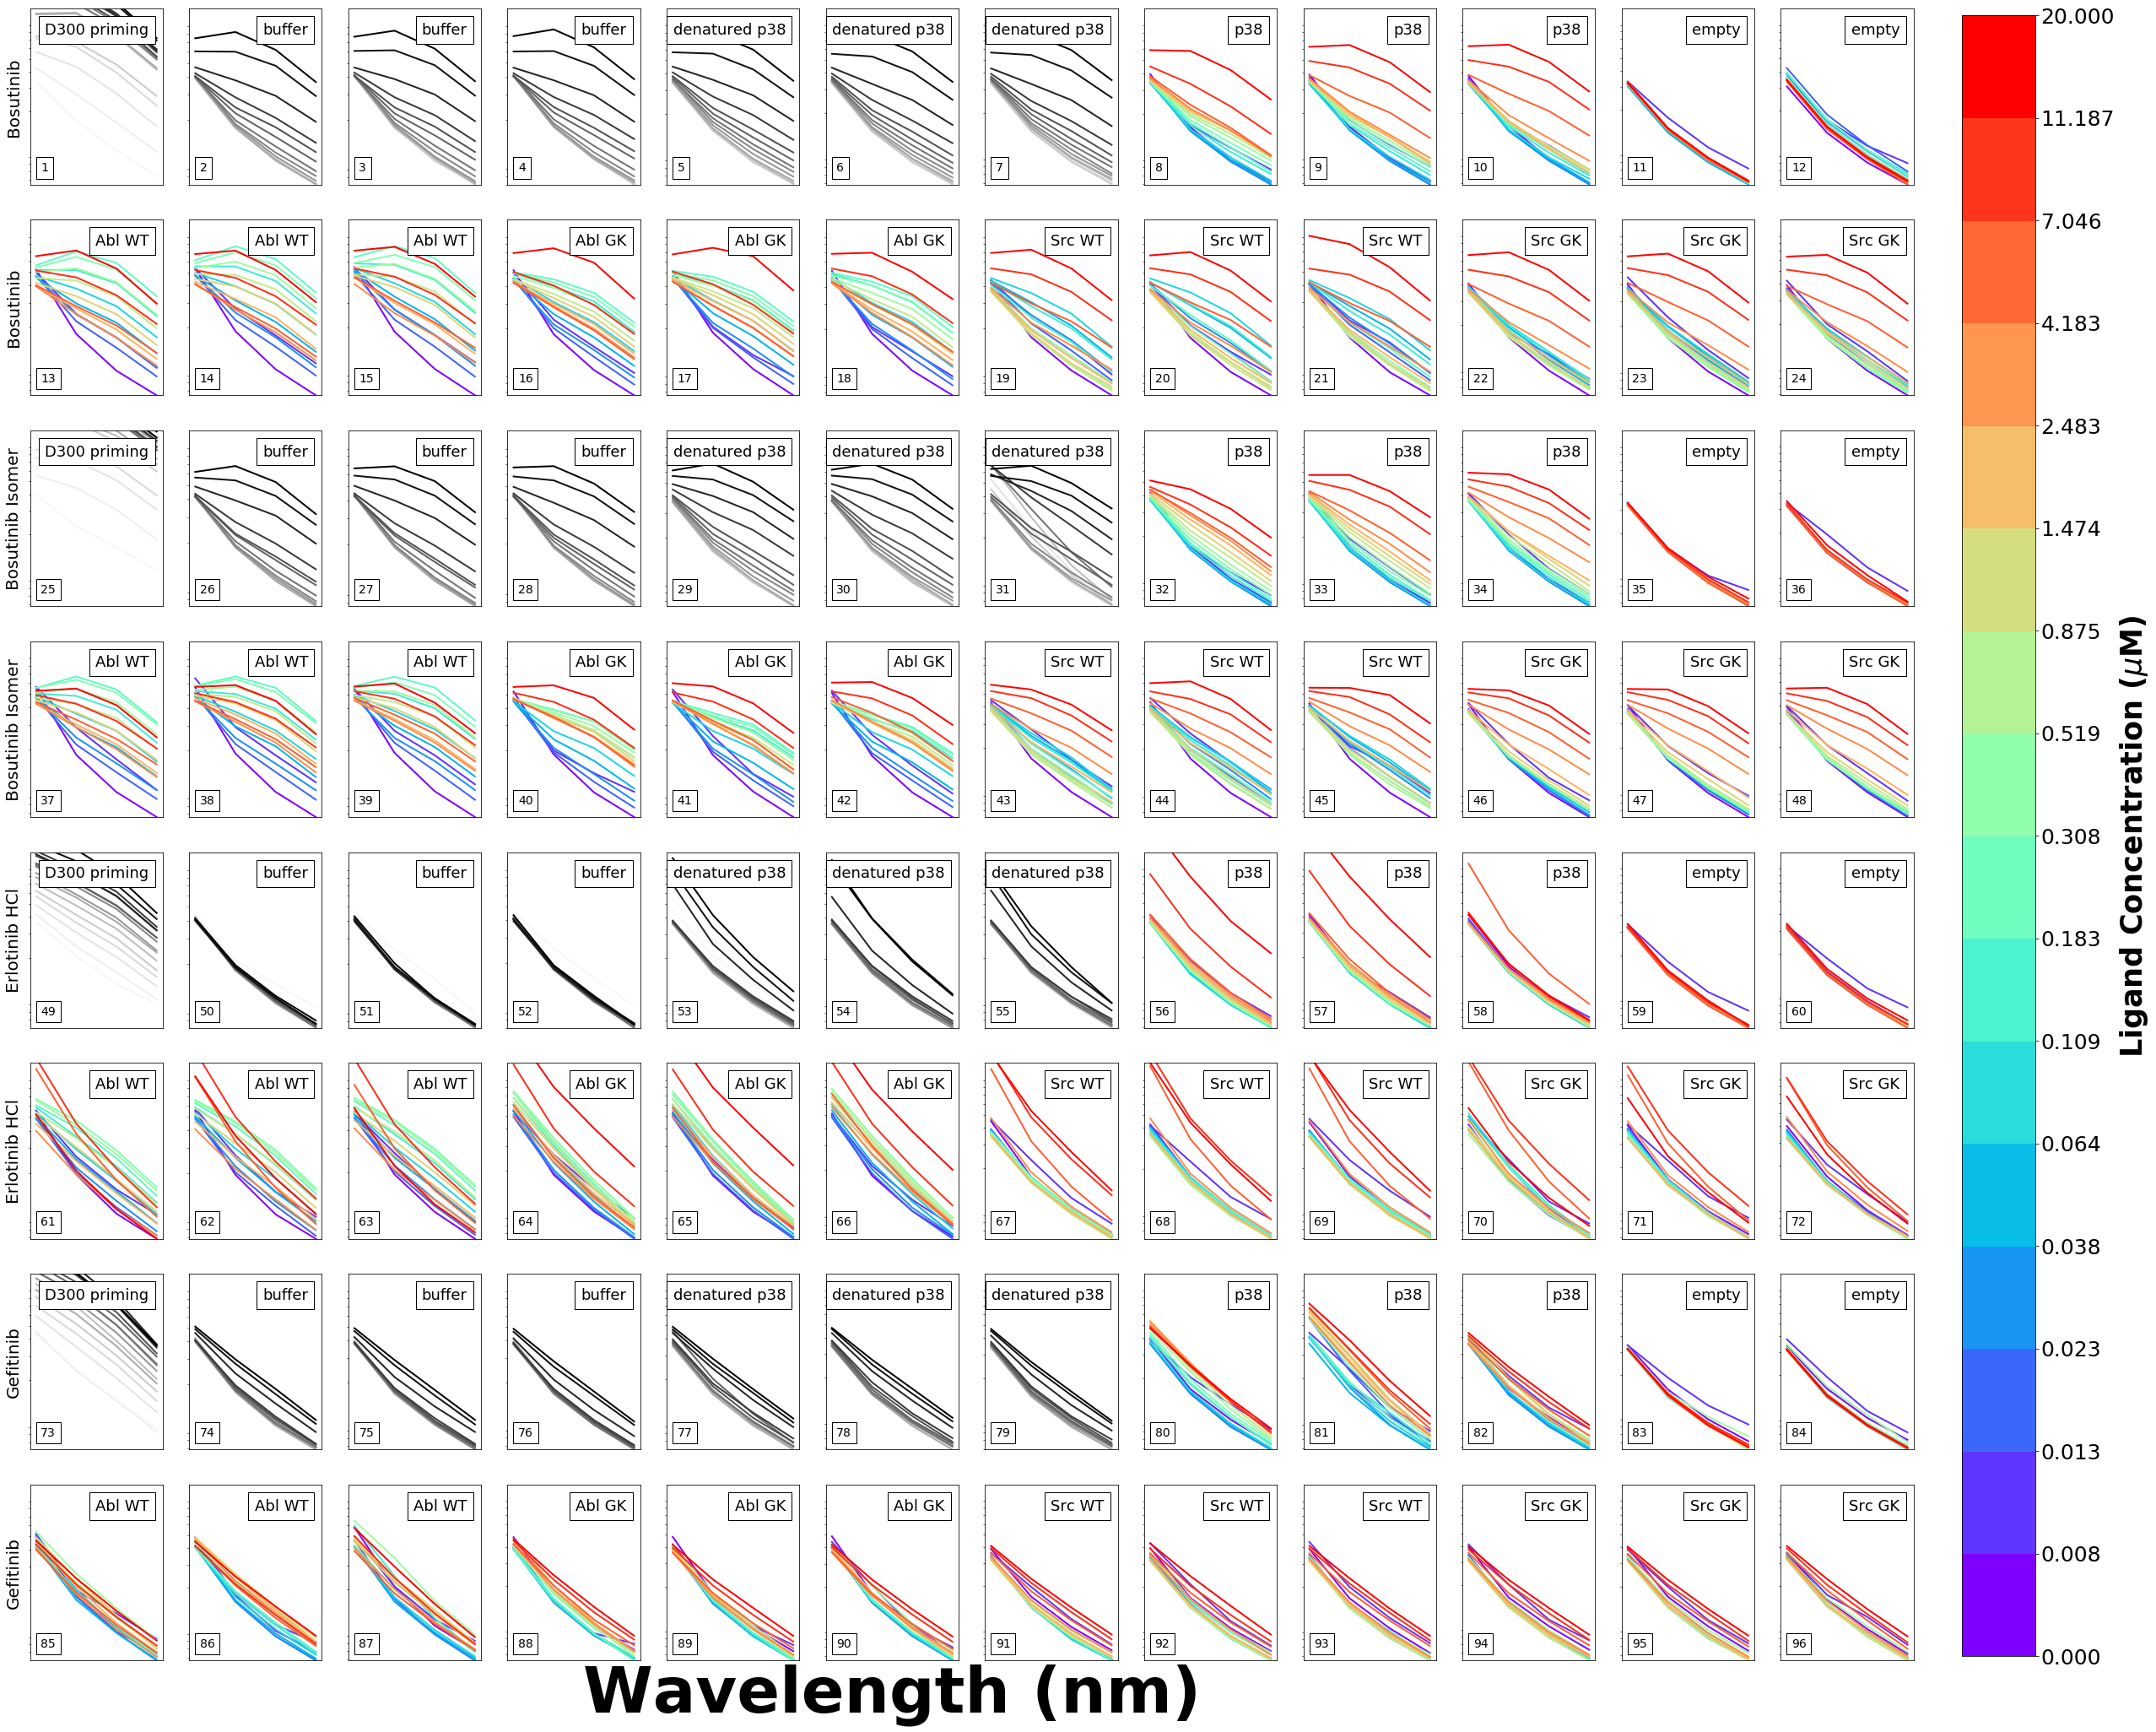

In [5]:

# print(measurements) ##### gives 17 arrays of correct data, but which well? #####


# In[25]:

nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])


label = 'ex280_scan_top_gain100'
title = 'Specta Reads at 280nm'


ymax = data.max().max().max()
xmax = max(list(reads[0][label][well].keys()))
xmin = min(list(reads[0][label][well].keys()))
c = list(concentrations)

# x_values = list(reads[0][label][well].keys())
# print(data[1,0,:,:])
# for value in range(17):
#     plt.semilogy(x_values,data[1,0,value,:])


for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            gray = cm.Greys(np.linspace(0,1,17))
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming', 'denatured p38']:
                 color=cm.Greys(np.linspace(0,1,17))
            else:
                color=cm.rainbow(np.linspace(0,1,17))
            for read, c in zip(data[row_index,col_index,:,:], color):
                plt.semilogy(x_values, read, c=c, linewidth=2);
                


            #if index == 36:
            #    plt.xticks(np.arange(int(x_values[20]), 600, 40),x_values[20::8], rotation=90, fontsize=18)

            plt.xticks([]);
            plt.yticks([]);
            plt.ylim(0, 12000)
            # label subplots with contents of wells and index # 
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            if index == 89:
                 plt.xlabel('Wavelength (nm)', fontsize=75, fontweight='bold')
#             if index == 36:
#                 plt.ylabel('Fluorescence (AU)', fontsize=75, fontweight='bold')
                
            # ligand labels
            if index == 12 or index == 0:
                plt.ylabel('Bosutinib', fontsize=20)
            if index == 24 or index == 36:
                plt.ylabel('Bosutinib Isomer', fontsize=20)
            if index == 48 or index == 60:
                plt.ylabel('Erlotinib HCl', fontsize=20)
            if index == 72 or index == 84:
                plt.ylabel('Gefitinib', fontsize=20)

            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
            ax.add_artist(anchored_text2)

# Get rid of ticks on the last plot, which isn't being used

# ax = plt.subplot(nrows_fig,ncols_fig,index+1)
# fig.delaxes(ax)
# fig.subplots_adjust(wspace=0, hspace=0)
cax = fig.add_axes([.92, 0.127, 0.03, 0.75])

micro_concentrations = np.multiply(concentrations, 1e6)
norm = matplotlib.colors.BoundaryNorm(micro_concentrations, cm.rainbow.N)
conc_labels = ['{0:.3f}'.format(x) for x in micro_concentrations]
cb = matplotlib.colorbar.ColorbarBase(cax, cmap='rainbow', norm=norm, ticks=micro_concentrations, boundaries=micro_concentrations)
cb.set_label('Ligand Concentration ($\mu$M)', fontsize=35, fontweight='bold')
cb.ax.tick_params(labelsize=25)
cb.ax.set_yticklabels(conc_labels)

fig.savefig('single_well_spectra_log_y.pdf', bbox_inches='tight', dpi=300)




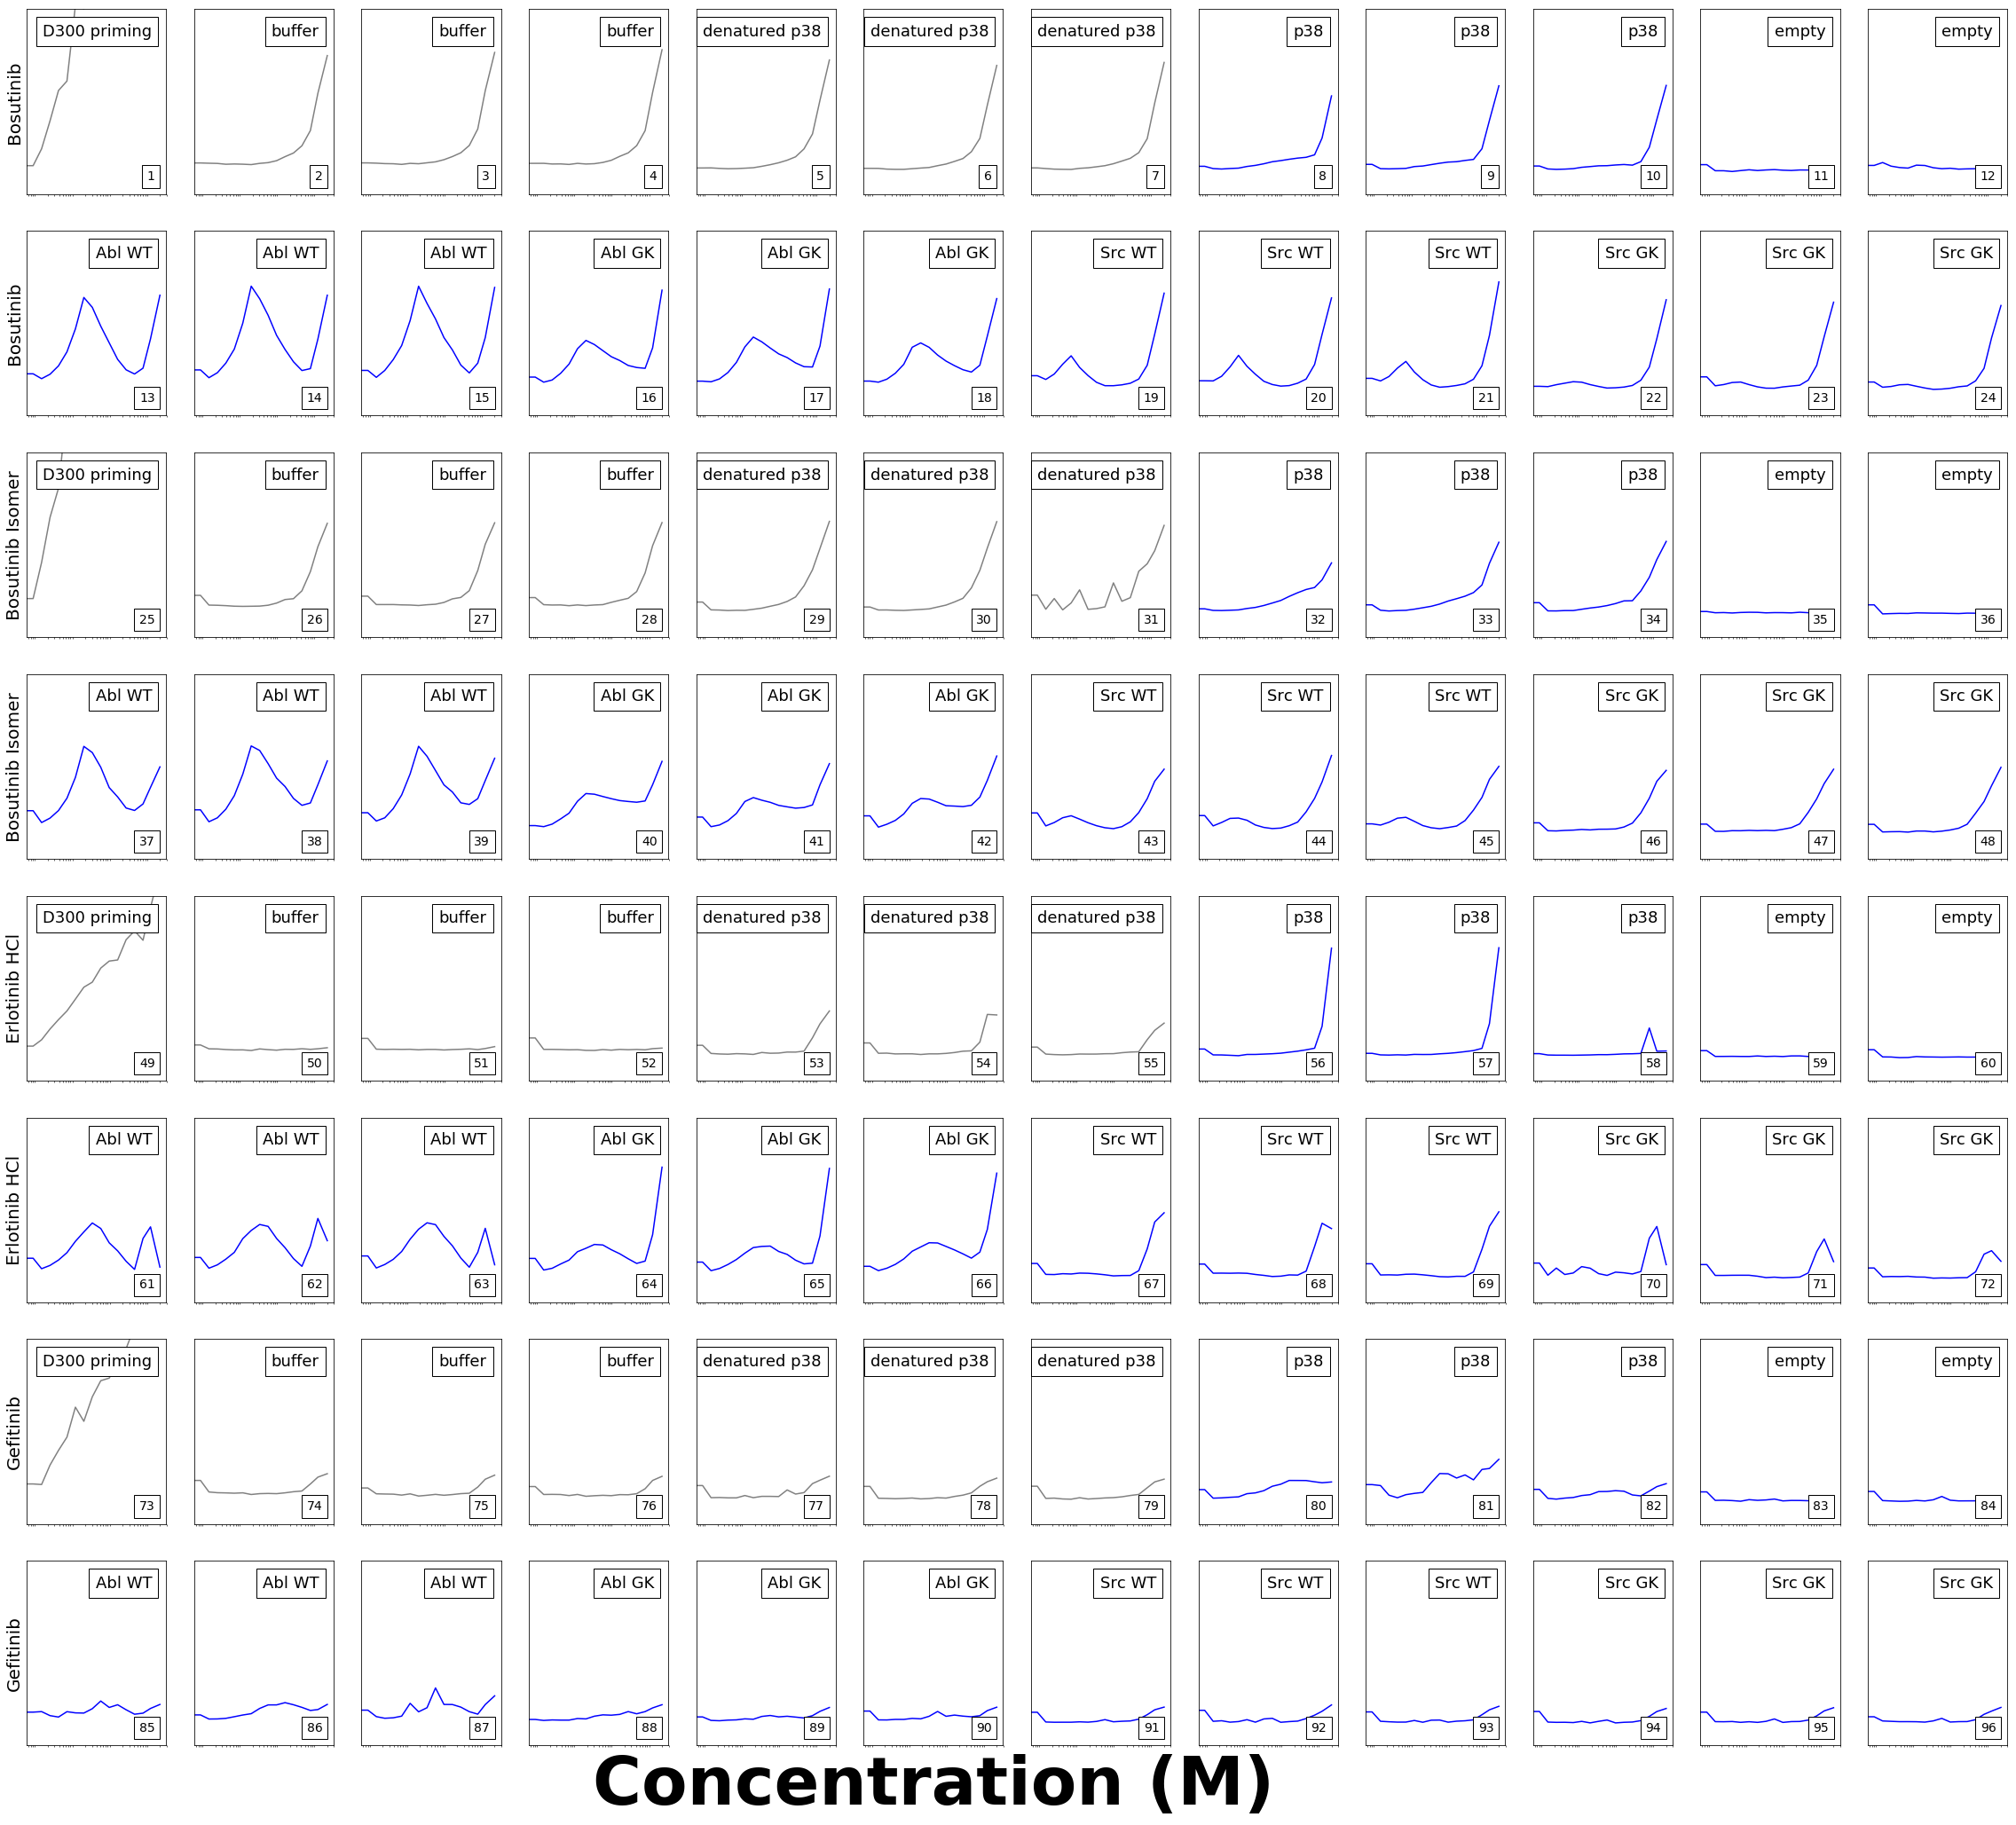

In [6]:
### plot at one wavelength, 480 nm

nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

label = 'ex280_scan_top_gain100'
title = 'Specta Reads at 280nm'

x_values = concentrations

# data_480 = np.array(data[1,0,:,1])
# print(data_480)
# for value in range(17):
#     plt.semilogx(x_values,data_480)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = concentrations
        fluo_values = [list(reads[i][label][well].values())[1] for i in range(nreads)]
        fluo_values = [float(i) for i in fluo_values]
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            gray = cm.Greys(np.linspace(0,1,17))
#             if plate_layout[plate_layout.well == well].name.any() != 'empty':
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming', 'denatured p38']:
                 color='0.5'
            else:
                color= 'b'
            plt.semilogx(x_values, fluo_values, color = color)
            plt.ylim(0, 11000)

#             #if index == 36:
#             #    plt.xticks(np.arange(int(x_values[20]), 600, 40),x_values[20::8], rotation=90, fontsize=18)

            plt.xticks([]);
            plt.yticks([]);

            # label subplots with contents of wells and index # 
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            if index == 89:
                 plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
#             if index == 36:
#                 plt.ylabel('Fluorescence (AU)', fontsize=75, fontweight='bold')
                
            # ligand labels
            if index == 12 or index == 0:
                plt.ylabel('Bosutinib', fontsize=20)
            if index == 24 or index == 36:
                plt.ylabel('Bosutinib Isomer', fontsize=20)
            if index == 48 or index == 60:
                plt.ylabel('Erlotinib HCl', fontsize=20)
            if index == 72 or index == 84:
                plt.ylabel('Gefitinib', fontsize=20)

            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=4, prop=dict(size=14))
            ax.add_artist(anchored_text2)

            
fig.savefig('single_well_spectra_fluorescence.pdf', bbox_inches='tight', dpi=300)
